# Análise de Valor como Desenvolvedora
Este notebook apresenta análises para demonstrar o valor agregado como desenvolvedora, usando os dados extraídos do Jira.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o CSV gerado pelo relatório Jira
df = pd.read_csv('/Users/erikalima/Documents/all_tasks_developed_by_erika_lima.csv')
df.head()

,BEES CODE,Title,Issue Type,Number of commits,Start Date,Final Date,Time to Develop (days),Story Points,Status,Assignee,Reporter,Development Commits
0,BEESEDI-37317,[Growth Incentives][FE][NFA] Change de KPI dis...,Story,0,NaN,NaN,0,8.0,In Development,Erika Lima,Bruna Dorta,0
1,BEESEDI-36529,CLONE - [NL] Punten is used instead of punt fo...,Bug,9,26/05/2025,28/05/2025,3,0.0,In Production,Erika Lima,Kseniia Riabukha,0
2,BEESEDI-36441,The Club B button is appearing for key accounts,Bug,5,21/05/2025,23/05/2025,3,0.0,In Production,Erika Lima,Giusseppe Cáceres,0
3,BEESEDI-36173,[FE][TERMS AND CONDITIONS] - Error 500 in endp...,Bug,2,16/05/2025,19/05/2025,2,0.0,In Production,Erika Lima,Thiago.Bruno,0
4,BEESEDI-35153,[FE] Upgrade web-link-insights dependencies wi...,Technical Task,2,28/04/2025,29/04/2025,2,2.0,Done,Erika Lima,Gustavo Furlan Pagotto,0


## 1. Participação em Demandas Críticas
Aqui consideramos como demandas críticas as issues do tipo 'Bug', 'Critical' ou 'Urgent'.

In [5]:
# Filtrar demandas críticas
demandas_criticas = df[df['Issue Type'].str.contains('Bug|Critical|Urgent', case=False, na=False)]
print(f'Total de demandas críticas entregues: {len(demandas_criticas)}')
demandas_criticas[['BEES CODE', 'Title', 'Issue Type', 'Status', 'Start Date', 'Final Date']].head()

Total de demandas críticas entregues: 40


,BEES CODE,Title,Issue Type,Status,Start Date,Final Date
1,BEESEDI-36529,CLONE - [NL] Punten is used instead of punt fo...,Bug,In Production,26/05/2025,28/05/2025
2,BEESEDI-36441,The Club B button is appearing for key accounts,Bug,In Production,21/05/2025,23/05/2025
3,BEESEDI-36173,[FE][TERMS AND CONDITIONS] - Error 500 in endp...,Bug,In Production,16/05/2025,19/05/2025
7,BEESEDI-33835,[FE][LINK][ALERT_MESSAGES] Filters are impacti...,Bug,In Production,20/03/2025,01/04/2025
10,BEESEDI-33590,[FE][Link][Alert_Messages] Messages reopen aft...,Bug,In Production,13/03/2025,19/03/2025


## 2. Evolução ao Longo do Tempo
Vamos analisar a quantidade de tasks entregues e story points entregues por mês.

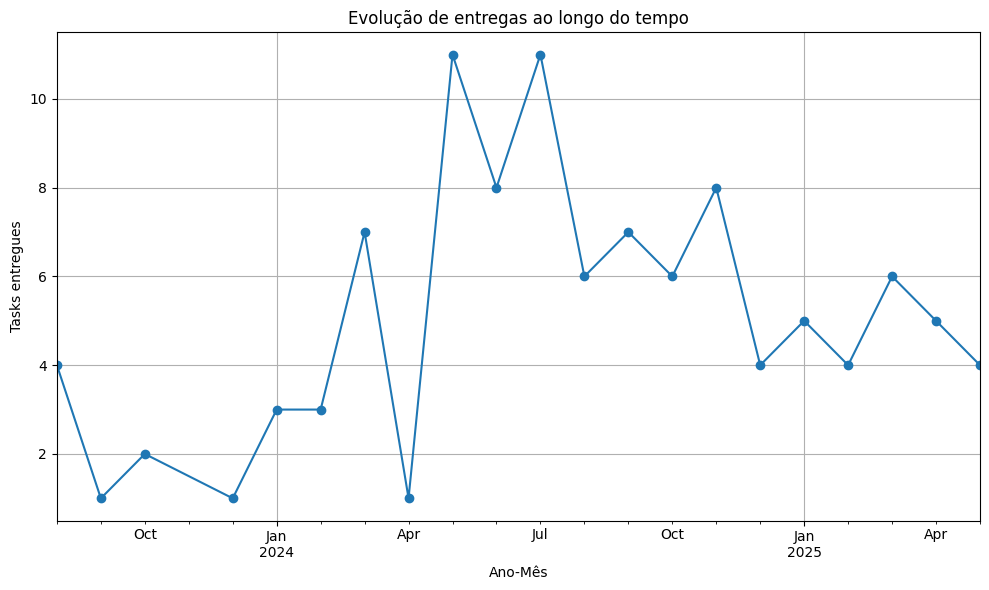

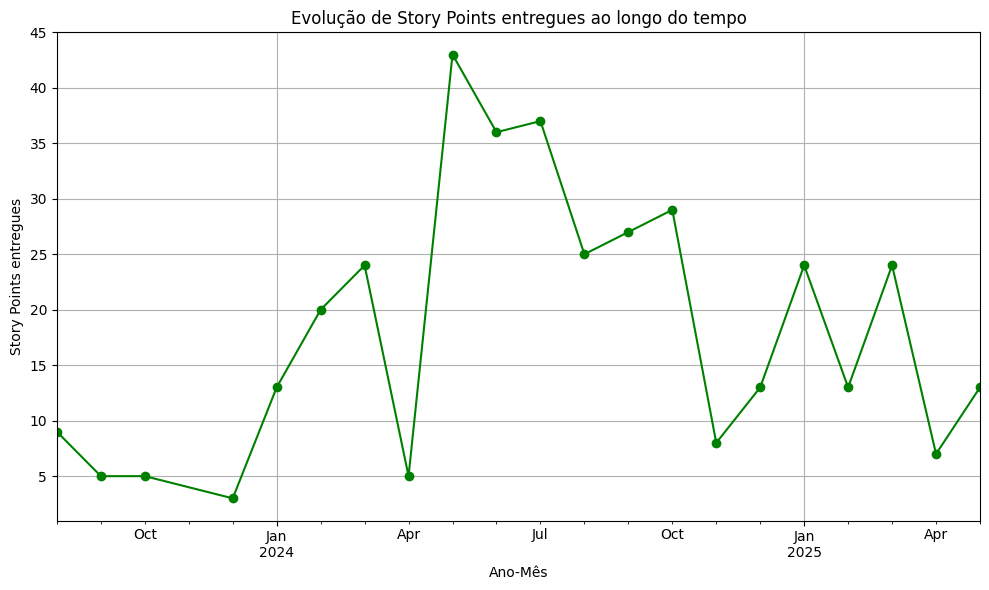

In [6]:
# Converter datas
df['Final Date'] = pd.to_datetime(df['Final Date'], format='%d/%m/%Y', errors='coerce')
df['AnoMes'] = df['Final Date'].dt.to_period('M')

# Tasks entregues por mês
tasks_por_mes = df.groupby('AnoMes').size()
plt.figure(figsize=(10,6))
tasks_por_mes.plot(marker='o')
plt.title('Evolução de entregas ao longo do tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Tasks entregues')
plt.grid(True)
plt.tight_layout()
plt.show()

# Story points entregues por mês
if 'Story Points' in df.columns:
    sp_por_mes = df.groupby('AnoMes')['Story Points'].sum()
    plt.figure(figsize=(10,6))
    sp_por_mes.plot(marker='o', color='green')
    plt.title('Evolução de Story Points entregues ao longo do tempo')
    plt.xlabel('Ano-Mês')
    plt.ylabel('Story Points entregues')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 3. Exemplos de Impacto
Vamos destacar as tasks de maior impacto: maior story points, maior tempo de desenvolvimento e os top 5 de cada critério.

In [7]:
# Task com maior story points
maior_sp = df.loc[df['Story Points'].idxmax()]
print('Task com maior Story Points:')
display(maior_sp[['BEES CODE', 'Title', 'Story Points', 'Issue Type', 'Final Date']])

# Task com maior tempo de desenvolvimento
df['Time to Develop (days)'] = pd.to_numeric(df['Time to Develop (days)'], errors='coerce')
maior_tempo = df.loc[df['Time to Develop (days)'].idxmax()]
print('Task com maior tempo de desenvolvimento:')
display(maior_tempo[['BEES CODE', 'Title', 'Time to Develop (days)', 'Issue Type', 'Final Date']])

# Top 5 maiores Story Points
print('Top 5 tasks por Story Points:')
display(df.sort_values('Story Points', ascending=False)[['BEES CODE', 'Title', 'Story Points', 'Issue Type', 'Final Date']].head(5))

# Top 5 maior tempo de desenvolvimento
print('Top 5 tasks por tempo de desenvolvimento:')
display(df.sort_values('Time to Develop (days)', ascending=False)[['BEES CODE', 'Title', 'Time to Develop (days)', 'Issue Type', 'Final Date']].head(5))

Task com maior Story Points:


BEES CODE                                           BEESEDI-34220
Title           [FE] [Link] Adjust for new visibility endpoint...
Story Points                                                 13.0
Issue Type                                            Improvement
Final Date                                    2025-05-16 00:00:00
Name: 6, dtype: object

Task com maior tempo de desenvolvimento:


BEES CODE                                        BEESEDI-20921
Title                     [Comm Agr] [FE] [Link] Period filter
Time to Develop (days)                                      14
Issue Type                                               Story
Final Date                                 2024-05-02 00:00:00
Name: 87, dtype: object

Top 5 tasks por Story Points:


,BEES CODE,Title,Story Points,Issue Type,Final Date
6,BEESEDI-34220,[FE] [Link] Adjust for new visibility endpoint...,13.0,Improvement,2025-05-16
84,BEESEDI-21566,[Comm Agr] [FE] [One] IRS creation page,10.0,Story,2024-05-03
20,BEESEDI-31270,[FE] [Link] Adjust homepage summary,8.0,Improvement,2025-02-10
23,BEESEDI-30454,[FE] [Link] Create new tab on details tray,8.0,Story,2025-03-18
0,BEESEDI-37317,[Growth Incentives][FE][NFA] Change de KPI dis...,8.0,Story,NaT


Top 5 tasks por tempo de desenvolvimento:


,BEES CODE,Title,Time to Develop (days),Issue Type,Final Date
87,BEESEDI-20921,[Comm Agr] [FE] [Link] Period filter,14,Story,2024-05-02
85,BEESEDI-21232,[Comm Agr] [FE] [Link] IRS component,10,Story,2024-06-06
55,BEESEDI-25631,[FE] [Link] IRS page responsiveness,9,Improvement,2024-09-03
107,BEESEDI-16991,[Commercial Agreements] [FE] [Link] Show Terms...,8,Story,2024-01-11
33,BEESEDI-28911,[FE] [One] Refactoring - UpdateKPIs,8,Refactoring,2024-11-29


## 4. Tempo Médio de Desenvolvimento por Tipo de Task
Visualização do tempo médio de desenvolvimento por tipo de issue.

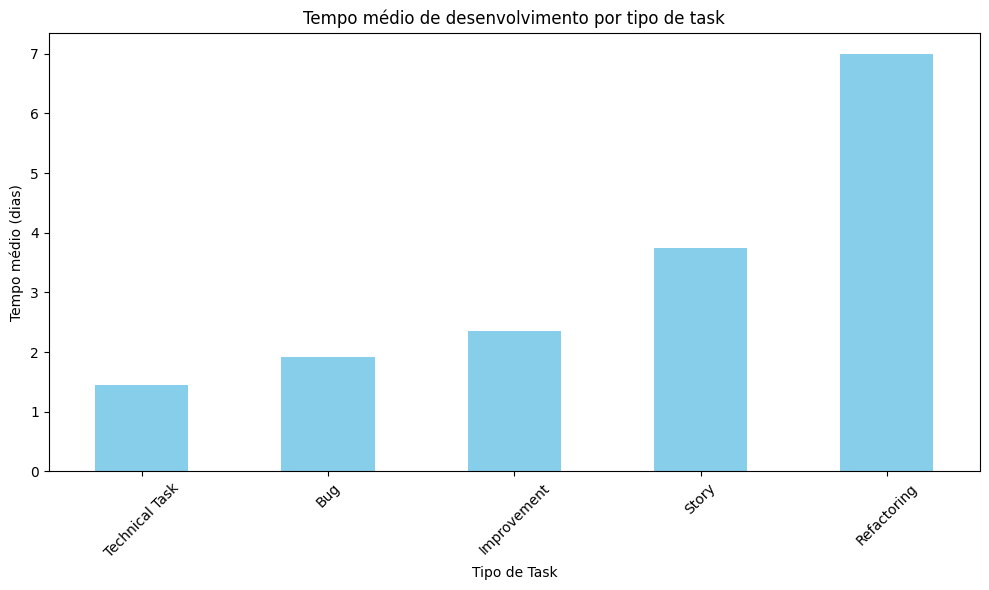

In [8]:
media_tempo = df.groupby('Issue Type')['Time to Develop (days)'].mean().sort_values()
plt.figure(figsize=(10,6))
media_tempo.plot(kind='bar', color='skyblue')
plt.title('Tempo médio de desenvolvimento por tipo de task')
plt.ylabel('Tempo médio (dias)')
plt.xlabel('Tipo de Task')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()